In [564]:
import pandas as pd
import geopandas as gpd
import numpy as np
import folium
import shapely
#import branca

from folium import plugins
from shapely.ops import cascaded_union

#from shapely.geometry import Polygon, LineString, mapping
from pyproj import Proj 
#from shapely.ops import transform

import pyproj
import unidecode
import warnings
warnings.filterwarnings('ignore')



In [565]:
#dir(shapely.geometry)

In [566]:
# Nettoyage de données

def convertion_chaine(ch):            # Fonction pour la conversion de miniscules en majuscules
    
    if isinstance(ch, str):
        if isinstance(ch, (str)):
            ch = ch.strip()
            ch = ch.upper()

        else:
            pass
    return ch

def join_chaine(ch):                 # fonction pour l'utiliser espace comme séparateur à la place du underscore
    if isinstance(ch, (str)):
        if isinstance(ch.rfind('_'), (int, float)):
            ch = ch.split('_')
            ch = ' '.join(ch)

        

        else:
            pass
   
    return ch
def join_chaine1(ch):               # fonction pour l'utiliser espace comme séparateur à la place du tiré du 6
    if isinstance(ch, (str)):
        if isinstance(ch.rfind('-'), (int, float)):
            ch = ch.split('-')
            ch = ' '.join(ch)
    

        else:
            pass

    
    return ch
def join_chaine2(ch):
    if isinstance(ch, (str)):
         if isinstance(ch.rfind('/'), (int, float)):
            ch = ch.split('/')
            ch = ' '.join(ch)
    

         else:
            pass

   
    return ch

def join_chaine3(ch):
    
    if isinstance(ch, str):
         
        if isinstance(ch.rfind('('), (int, float)):
            ch = ch.split('(')
            ch = ' '.join(ch)


        else:
            pass
   
    return ch

def supprimer_accent(ch):                     # Fonction pour la suppression des accents
    
    if isinstance(ch, (str)):
        return unidecode.unidecode(ch)
    
def nettoyer_chaine(ch):                     # Fonction glabale
    ch = convertion_chaine(ch)
    ch = join_chaine(ch)
    ch = join_chaine1(ch)
    ch = join_chaine2(ch)
    #chaine = join_chaine3(chaine)
    ch = supprimer_accent(ch)
    return ch

In [567]:
localites = pd.read_excel('fichier propre.xlsx', header = 0)
#localites.drop(columns = ['Commune'], inplace = True)
#localites.rename(columns = {'Nom de la localité': 'Commune'}, inplace = True)
#localites['Commune'] = localites['Commune'].apply(join_chaine2)
localites

Unnamed: 0       Région         Departement Nom_arrondissement  \
0               0  SAINT LOUIS               PODOR       GAMADJI SARE   
1               1     KAFFRINE           KOUNGHEUL        LOUR ESCALE   
2               2  SAINT LOUIS               PODOR            CAS CAS   
3               3        KOLDA  MEDINA YORO FOULAH            NIAMING   
4               4   ZIGUINCHOR             BIGNONA           KATABA 1   
...           ...          ...                 ...                ...   
10750       10750        THIES               MBOUR             SINDIA   
10751       10751        THIES               MBOUR             SINDIA   
10752       10752        THIES               MBOUR             SINDIA   
10753       10753        THIES            TIVAOUNE            MEOUANE   
10754       10754   ZIGUINCHOR             BIGNONA           KATABA 1   

                  Commune  Nom de la localité  X_localité  Y_localité  
0          GUEDE CHANTIER                 ABA    538565.0   1814623.0  
1             LOUR ESCALE       ABBI SANKHONE    520839.0   1571063.0  
2                    MERY            ABDALLAH    609892.0   1795544.0  
3              DINGUIRAYE            ABEKOUTA    541826.0   1473335.0  
4              KAFOUNTINE               ABENE    313449.0   1437540.0  
...                   ...                 ...         ...         ...  
10750            NGAPAROU            NGAPAROU         NaN         NaN  
10751              SOMONE              SOMONE         NaN         NaN  
10752  POPENGUINE NDAYANE  POPENGUINE NDAYANE         NaN         NaN  
10753               MBORO               MBORO         NaN         NaN  
10754          DIOULOULOU          DIOULOULOU         NaN         NaN  

[10755 rows x 8 columns]

In [568]:
latitude, longitude = coordonnees(localites, 'X_localité', 'Y_localité')
localites['lat'] = latitude
localites['lon'] = longitude

In [569]:
# Créer un dataframe pour les régions et leurs codes codifiées
region = pd.read_excel('Codification des communes.xlsx', sheet_name = 'Région et codes', header = 0)

In [570]:
region = region.drop(columns = ['Unnamed: 0'])
region.rename(columns = {'Région': 'nom'}, inplace = True)       # Renommer la colonne `Région` en `nom`
region.rename(columns = {'Code région': 'code'}, inplace = True) # Renommer la colonne `Code région` en `code`
region

nom  code
0         DAKAR  SN01
1    ZIGUINCHOR  SN02
2      DIOURBEL  SN03
3   SAINT LOUIS  SN04
4   TAMBACOUNDA  SN05
5       KAOLACK  SN06
6         THIES  SN07
7         LOUGA  SN08
8        FATICK  SN09
9         KOLDA  SN10
10        MATAM  SN11
11     KAFFRINE  SN12
12     KEDOUGOU  SN13
13      SEDHIOU  SN14

In [571]:
region.to_csv('regions.csv', sep = ';', index = False)  # engister sur le disque dur le dataframe `region`

In [572]:
# Dataframe pour les départements, avec la colonne `region_id` comme clé étrangère
departement = commune = pd.read_excel('Codification des communes.xlsx', sheet_name = 'fichier depart et codes', header = 0)
departement = departement[['Departement', 'Code departement', 'Code région']]
departement = departement.rename({'Departement': 'nom', 'Code departement': 'code', 'Code région': 'region_id'}, axis = 1)
departement = departement.drop_duplicates(subset = ['code'])
departement

nom   code region_id
0                 DAKAR  SN011      SN01
19               PIKINE  SN012      SN01
31             RUFISQUE  SN013      SN01
42           GUEDIAWAYE  SN014      SN01
47          KEUR MASSAR  SN015      SN01
53              BIGNONA  SN021      SN02
72             OUSSOUYE  SN022      SN02
77           ZIGUINCHOR  SN023      SN02
83               BAMBEY  SN031      SN03
95             DIOURBEL  SN032      SN03
107              MBACKE  SN033      SN03
123              DAGANA  SN041      SN04
134               PODOR  SN042      SN04
156         SAINT LOUIS  SN043      SN04
161               BAKEL  SN051      SN05
173         TAMBACOUNDA  SN052      SN05
182             GOUDIRY  SN053      SN05
197         KOUMPENTOUM  SN054      SN05
207             KAOLACK  SN061      SN06
221        NIORO DU RIP  SN062      SN06
236          GUINGUINEO  SN063      SN06
248               MBOUR  SN071      SN07
264               THIES  SN072      SN07
279            TIVAOUNE  SN073      SN07
297             KEBEMER  SN081      SN08
316            LINGUERE  SN082      SN08
335               LOUGA  SN083      SN08
352              FATICK  SN091      SN09
369         FOUNDIOUGNE  SN092      SN09
386              GOSSAS  SN093      SN09
392               KOLDA  SN101      SN10
407           VELINGARA  SN102      SN10
421  MEDINA YORO FOULAH  SN103      SN10
432               KANEL  SN111      SN11
444               MATAM  SN112      SN11
454             RANEROU  SN113      SN11
458            KAFFRINE  SN121      SN12
467           BIRKELANE  SN122      SN12
475           KOUNGHEUL  SN123      SN12
484         MALEM HODAR  SN124      SN12
491            KEDOUGOU  SN131      SN13
498            SALEMATA  SN132      SN13
504              SARAYA  SN133      SN13
510             SEDHIOU  SN141      SN14
524          BOUNKILING  SN142      SN14
538             GOUDOMP  SN143      SN14

In [573]:
departement.to_csv('departements.csv', sep = ';', index = False)

In [574]:
# Dataframe pour les arrondissments, avec `departement_id` comme clé étrangère
arrondissement = pd.read_excel('Codification des communes.xlsx', sheet_name = 'fichier depart et codes', header = 0)
arrondissement = arrondissement[['Nom_arrondissement', 'Code arrondissement', 'Code departement']]
arrondissement = arrondissement.rename({'arrondissement': 'nom', 'Code arrondissement': 'code', 'Code departement': 'departement_id'}, axis = 1)
arrondissement = arrondissement.drop_duplicates(subset = ['code'])
arrondissement

Nom_arrondissement    code departement_id
0                    NaN  SN0110          SN011
1          DAKAR PLATEAU  SN0112          SN011
5    PARCELLES ASSAINIES  SN0113          SN011
9            GRAND DAKAR  SN0114          SN011
15              ALMADIES  SN0115          SN011
..                   ...     ...            ...
534             DIAROUME  SN1424          SN142
538                  NaN  SN1430          SN143
539            KARANTABA  SN1432          SN143
541     SIMBANDI BRASSOU  SN1433          SN143
546             DJIBANAR  SN1434          SN143

[168 rows x 3 columns]

In [575]:
#arrondissement.to_csv('arrondissements.csv', sep = ';', index = False)

In [576]:
# Importer les communes codifiés(dans un autre notebook) depuis un fichier CSV vers un dataframe
commune = pd.read_excel('Codification des communes.xlsx', sheet_name = 'fichier depart et codes', header = 0)
commune = commune.drop(columns = ['Unnamed: 0'])
commune['Commune'] = commune['Commune'].apply(nettoyer_chaine) 
#commune = commune[['Code région', 'Departement', 'Nom_arrondissement', 'Commune', 'Code commune']]
#commune.rename(columns = {'Code région': 'region', 'Departement': 'departement', 'Nom_arrondissement': 'arrondissement', 'Commune': 'nom','Code commune': 'code'}, inplace = True)
commune

Région Code région Departement Code departement Nom_arrondissement  \
0      DAKAR        SN01       DAKAR            SN011                NaN   
1      DAKAR        SN01       DAKAR            SN011      DAKAR PLATEAU   
2      DAKAR        SN01       DAKAR            SN011      DAKAR PLATEAU   
3      DAKAR        SN01       DAKAR            SN011      DAKAR PLATEAU   
4      DAKAR        SN01       DAKAR            SN011      DAKAR PLATEAU   
..       ...         ...         ...              ...                ...   
548  SEDHIOU        SN14     GOUDOMP            SN143           DJIBANAR   
549  SEDHIOU        SN14     GOUDOMP            SN143           DJIBANAR   
550  SEDHIOU        SN14     GOUDOMP            SN143           DJIBANAR   
551  SEDHIOU        SN14     GOUDOMP            SN143           DJIBANAR   
552  SEDHIOU        SN14     GOUDOMP            SN143           DJIBANAR   

    Code arrondissement                     Commune Code commune  
0                SN0110                       GOREE      SN01101  
1                SN0112        FANN POINT E  AMITIE      SN01121  
2                SN0112  GUEULE TAPEE COLOBANE FASS      SN01122  
3                SN0112                      MEDINA      SN01123  
4                SN0112               DAKAR PLATEAU      SN01124  
..                  ...                         ...          ...  
548              SN1434          MANGAROUNGOU SANTO      SN14343  
549              SN1434            SIMBANDI BALANTE      SN14344  
550              SN1434              YARANG BALANTE      SN14345  
551              SN1434                DIATTACOUNDA      SN14346  
552              SN1434                      SAMINE      SN14347  

[553 rows x 8 columns]

In [577]:
commune[commune['Commune']== 'DAROU SALAM TYP']

Région Code région Departement Code departement Nom_arrondissement  \
111  DIOURBEL        SN03      MBACKE            SN033               KAEL   

    Code arrondissement          Commune Code commune  
111              SN0333  DAROU SALAM TYP      SN03332

In [578]:
# Charger le shapefile. 
shape_file = gpd.read_file('/home/lamine/artp/carte/limites commune/Limites_Communes.shp')
shape_file.rename(columns = {'REG': 'Région', 'DEPT': 'Departement', 'CAV': 'Nom_arrondissement', 'CCRCA': 'Commune'}, inplace = True)
shape_file = shape_file[['Région', 'Departement', 'Nom_arrondissement', 'Commune', 'geometry', 'SUP_HA']]
shape_file['Commune'] = shape_file['Commune'].apply(nettoyer_chaine) #nettoyer_chaine(list(shape_file['Commune']))
shape_file['Région'] = shape_file['Région'].replace({'SAINT-LOUIS': 'SAINT LOUIS'})
shape_file['Departement'] = shape_file['Departement'].replace({'MALEM HODDAR': 'MALEM HODAR'})
shape_file['Departement'] = shape_file['Departement'].replace({'TIVAOUANE': 'TIVAOUNE'})
shape_file['Commune'] = shape_file['Commune'].replace({'DAROU MINAM II': 'DAROU MINAME II'})

shape_file

Région  Departement Nom_arrondissement              Commune  \
0          DAKAR        DAKAR              DAKAR            CAMBERENE   
1          DAKAR        DAKAR              DAKAR  PARCELLES ASSAINIES   
2          DAKAR        DAKAR              DAKAR          PATTE D'OIE   
3          DAKAR        DAKAR              DAKAR                 YOFF   
4          DAKAR        DAKAR              DAKAR                 NGOR   
..           ...          ...                ...                  ...   
547     DIOURBEL       BAMBEY        BABA GARAGE           DINGUIRAYE   
548     DIOURBEL       MBACKE              NDAME             MISSIRAH   
549  TAMBACOUNDA  TAMBACOUNDA           MISSIRAH             MISSIRAH   
550       FATICK       FATICK            NIAKHAR                PATAR   
551     DIOURBEL     DIOURBEL             NDOULO                PATAR   

                                              geometry         SUP_HA  
0    POLYGON ((238976.287 1634670.693, 238995.825 1...     176.211179  
1    POLYGON ((237079.23 1634029.728, 237119.665 16...     361.229494  
2    POLYGON ((238736.789 1631992.516, 238764.184 1...     319.680255  
3    POLYGON ((233516.322 1633553.547, 233571.771 1...    1385.589548  
4    MULTIPOLYGON (((231003.596 1632719.498, 231035...     435.023028  
..                                                 ...            ...  
547  POLYGON ((354058.315 1661108.308, 353958.144 1...   11557.070685  
548  POLYGON ((403188.731 1656924.145, 402948.812 1...   11349.599995  
549  POLYGON ((666753 1510866, 666701 1510838, 6666...  142866.709201  
550  POLYGON ((353664.312 1614508.052, 353704.518 1...   11846.165329  
551  POLYGON ((374923.746 1628191.163, 376040.059 1...   11284.681848  

[552 rows x 6 columns]

In [579]:
#shape_file[shape_file['']]

In [580]:
# Effectuer une transformation inverse de la projection (UTM vers WGS 84)
shape_file = shape_file.to_crs({'proj': 'longlat', 'ellsp': 'WGS84', 'datum': 'WGS84'})
shape_file

Région  Departement Nom_arrondissement              Commune  \
0          DAKAR        DAKAR              DAKAR            CAMBERENE   
1          DAKAR        DAKAR              DAKAR  PARCELLES ASSAINIES   
2          DAKAR        DAKAR              DAKAR          PATTE D'OIE   
3          DAKAR        DAKAR              DAKAR                 YOFF   
4          DAKAR        DAKAR              DAKAR                 NGOR   
..           ...          ...                ...                  ...   
547     DIOURBEL       BAMBEY        BABA GARAGE           DINGUIRAYE   
548     DIOURBEL       MBACKE              NDAME             MISSIRAH   
549  TAMBACOUNDA  TAMBACOUNDA           MISSIRAH             MISSIRAH   
550       FATICK       FATICK            NIAKHAR                PATAR   
551     DIOURBEL     DIOURBEL             NDOULO                PATAR   

                                              geometry         SUP_HA  
0    POLYGON ((-17.42479 14.77339, -17.42461 14.773...     176.211179  
1    POLYGON ((-17.44234 14.76741, -17.44194 14.765...     361.229494  
2    POLYGON ((-17.42674 14.74917, -17.42649 14.748...     319.680255  
3    POLYGON ((-17.47536 14.76276, -17.47484 14.762...    1385.589548  
4    MULTIPOLYGON (((-17.4986 14.75497, -17.4983 14...     435.023028  
..                                                 ...            ...  
547  POLYGON ((-16.35753 15.0211, -16.35844 15.0186...   11557.070685  
548  POLYGON ((-15.90041 14.98555, -15.90264 14.983...   11349.599995  
549  POLYGON ((-13.45825 13.66191, -13.45874 13.661...  142866.709201  
550  POLYGON ((-16.35856 14.59987, -16.35819 14.599...   11846.165329  
551  POLYGON ((-16.16188 14.72463, -16.15146 14.715...   11284.681848  

[552 rows x 6 columns]

In [581]:
# Effectuer un tri des datarames en suivant cet ordre: région, département, arrondissmeent, commune
commune = commune.sort_values(by = ['Région', 'Departement', 'Nom_arrondissement', 'Commune'])
shape_file = shape_file.sort_values(by = ['Région', 'Departement', 'Nom_arrondissement', 'Commune'])
shape_file[shape_file['Commune'] == 'DAROU SALAM']

Région   Departement Nom_arrondissement      Commune  \
385  KAOLACK  NIORO DU RIP           PAOSKOTO  DAROU SALAM   

                                              geometry        SUP_HA  
385  POLYGON ((-15.80133 13.91014, -15.80023 13.910...  20251.996577

In [582]:
# Harmoniser les noms de communes pour assurer leur correspondance entre les fichiers et leurs conformité aux dénominations nationales
replace = {
    'Commune': [
        {
            'df': shape_file,
            'old_value': ["DIAMAGUENE/SICAP M'BAO", 'DIANKE MAKHA', 'FANN/POINT E/ AMITIE', 'FONGOLEMBI',
                     'BIGNARABE', 'BOKI DIALLOUBE', 'BOULEL GOUAMCK', 'DAROU KHOUDOSS', 'DIAMAGUENE SICAP MBAO',
                     'FANN POINT E AMITIE', 'HAMADY OUNARE', 'KEUR BIRAME', 'MAKACOULIBANTANG', 'MALEM HODDAR','MALEME NIANI',
                     'MONT ROLLAND', 'NDIOBENE SAMBA LAMA', 'NDIOUM NGAINTH', 'NDIOUMANE T. THIEKENE', 'NGAYE', 'NGUEKOKH', 'NGUIDJILOGNE',
                     'PANAL OUOLOF', 'PIKINE NORD (SUD)', 'POPENGUINE', 'SAMINE ESCALE', 'SARE COLY SALLE', 'TENGHORY', 'TESSEKRE FORAGE',
                     'THIAMENE DJOLOF (THIAMENE PASS)', 'THIONK ESSYL', 'BAMBA NDIAYENE (BAMBA THIALENE)', 'BAMBALI', 'BIGNARABI', 'BOULEL GOUMACK',
                     'BOUROUCO BIRANE CISSE', 'PLATEAU', 'DANKH SENE', 'DIANAH MALARY', 'TIVAOUANE', 'DIAXAY PARCELLE NIAKOULRAP', 'DAROU SALAM TYP',
                     'TIVAOUANE DIACKSAO', 'DJEMBERING', 'DIMBOLI', 'KARTIACK', 'KEUR MANDONGO',
                     'KEUR MOUSSEU (KEUR MOUSSA)', 'KHELCOM BIRANE', 'KOUNKANE', 'MEDINA WANDIFA', 'MBELACADIAO', 
                     'MEDINA EL HADJI', 'NYASSIA', 'PAOSKOTO', 'GUEULE TAPEE/COLOBANE/FASS', 'WAOUNDE', 'SALIKEGNE', 'SANTHIABA MANJACQUE', 
                     'TOMBORONKOTO', 'RUFISQUE NORD (CENTRE)', 'GUEULE TAPEE FASS COLOBANE'],
             'new_value': ['DIAMAGUENE SICAP MBAO', 'DIANKHE MAKHA', 'FANN POINT E AMITIE', 'FONGOLIMBI', 
                     'BIGNARABY', 'BOKE DIALLOUBE', 'BOULEL', 'DARHOU KHOUDOSS', "DIAMAGUENE SICAP M'BAO", 
                     "FANN POINT E  AMITIE", "HAMADY HOUNARE", 'KEUR BIRANE', 'MAKACOLIBANTANG', 'MALEM HODAR', 'MALEM NIANY', 
                     'MONT ROLAND', 'NDIOBENE SAMBA LAMO', 'NDIOUM NGAINTHE', 'NDIOUMANE', 'NGHAYE', 'NGUEKHOKH', 
                     'NGUIDJILONE', 'PANAL WOLOF', 'PIKINE NORD', 'POPENGUINE NDAYANE', 'SAMINE', 'SARE COLY SALE', 
                     'TENGHORI', 'TESSEKERE FORAGE', 'THIAMENE DJOLOF', 'THIONCK ESSYL', 'BAMBA THIALENE', 'BAMBALY', 
                     'BIGNARABY', 'BOULEL', 'BOUROUCO', 'DAKAR PLATEAU', 'NDANKH SENE', 'DIANNAH MALARY', 'TIVAOUNE', 
                     'JAXAAY PARCELLES', 'DAROU SALAM', 'DIACK SAO', 'DIEMBERING', 'DIMBOLY', 
                     'KARTHIACK', 'KEUR MADONGO', 'KEUR MOUSSA', 'KHELCOM BIRAME', 'KOUKANE', 'MADINA WANDIFA', 
                     'MBELACADIO', 'MEDINA EL HADJ', 'NIASSIA', 'PAOS KOTO', 'GUEULE TAPEE COLOBANE FASS', 'OUAOUNDE', 'SALYKEGNE', 
                     'SANTHIABA MANJACK', 'TOMBORONCOTO', 'RUFISQUE NORD', 'GUEULE TAPEE COLOBANE FASS']
            
        },
        {
            'df': commune,
            'old_value' : ['RUFISQUE  EST', 'SAM  NOTAIRE', 'PATAR SINE', 'DAROU SALAM TYP'],
            'new_value' : ['RUFISQUE EST', 'SAM NOTAIRE', 'PATAR', 'DAROU SALAM']
        }
    ],
}
    
for colonne, replacements in replace.items():
    for r in replacements:
        df = r['df']
        df[colonne] = df[colonne].replace(r['old_value'], r['new_value'])

#shape_file[shape_file['Commune'] == 'DAROU SALAM']

In [583]:
commune[commune['Commune'] == 'BIGNARABY']

Région Code région         Departement Code departement  \
422  KOLDA        SN10  MEDINA YORO FOULAH            SN103   

    Nom_arrondissement Code arrondissement    Commune Code commune  
422             NDORNA              SN1032  BIGNARABY      SN10321

In [584]:
shape_file[shape_file['Commune'] == 'MLOMP']

Région Departement Nom_arrondissement Commune  \
529  ZIGUINCHOR     BIGNONA           TENDOUCK   MLOMP   
520  ZIGUINCHOR    OUSSOUYE      LOUDIA OUOLOF   MLOMP   

                                              geometry        SUP_HA  
529  POLYGON ((-16.43534 12.83649, -16.45694 12.781...   9618.920139  
520  POLYGON ((-16.52024 12.54958, -16.51722 12.549...  23069.966218

In [585]:
# Fonction destinée à modifier les valeurs d'une colonne spécifique dans un dataframe
def update_df(df, line, column, value):
    df.loc[line, column] = value

In [586]:
# Ajouter du département de Keur Massar récessement créé dans le shapefile
for line in [47, 26, 27, 28]:
    update_df(shape_file, line, 'Departement', 'KEUR MASSAR')
#shape_file.loc[47, 'Departement'] = 'KEUR MASSAR'
#shape_file.loc[26, 'Departement'] = 'KEUR MASSAR'
#shape_file.loc[27, 'Departement'] = 'KEUR MASSAR'
#shape_file.loc[28, 'Departement'] = 'KEUR MASSAR'

In [587]:
# Concaténer les deux dataframes
df = pd.concat([commune, shape_file])
# Supprimer les lignes du dataframe qui sont en double afin de voir la différence
difference = df.drop_duplicates(['Région', 'Commune'], keep = False) 
difference

Région Code région  Departement Code departement Nom_arrondissement  \
52  DAKAR        SN01  KEUR MASSAR            SN015             JAXAAY   
47  DAKAR        SN01  KEUR MASSAR            SN015             MALIKA   
25  DAKAR         NaN       PIKINE              NaN             PIKINE   

   Code arrondissement           Commune Code commune  \
52              SN0153   KEUR MASSAR SUD      SN01532   
47              SN0151  KEUR MASSAR NORD      SN01511   
25                 NaN       KEUR MASSAR          NaN   

                                             geometry       SUP_HA  
52                                               None          NaN  
47                                               None          NaN  
25  POLYGON ((-17.30355 14.82073, -17.30328 14.820...  2065.514669

In [588]:
# Garder la première double du dataframe
commune_shape_file_first = df[df.duplicated(subset = ['Departement', 'Commune'], keep = 'first') == True]
commune_shape_file_first = commune_shape_file_first.drop_duplicates(subset = ['Departement', 'Commune'])

# Garder la dernière ligne du dataframe
commune_shape_file_last = df[df.duplicated(subset = ['Departement', 'Commune'], keep = 'last') == True]
commune_shape_file_last = commune_shape_file_last.drop_duplicates(subset = ['Departement', 'Commune'])


# Trier les 2 dataframes sur la colonne `Commune`
commune_shape_file_last = commune_shape_file_last.sort_values(by = ['Commune']).reset_index(drop = True)
commune_shape_file_first = commune_shape_file_first.sort_values(by = ['Commune']).reset_index(drop = True)
df

Région Code région Departement Code departement Nom_arrondissement  \
15        DAKAR        SN01       DAKAR            SN011           ALMADIES   
16        DAKAR        SN01       DAKAR            SN011           ALMADIES   
17        DAKAR        SN01       DAKAR            SN011           ALMADIES   
18        DAKAR        SN01       DAKAR            SN011           ALMADIES   
4         DAKAR        SN01       DAKAR            SN011      DAKAR PLATEAU   
..          ...         ...         ...              ...                ...   
542  ZIGUINCHOR         NaN  ZIGUINCHOR              NaN            NIAGUIS   
545  ZIGUINCHOR         NaN  ZIGUINCHOR              NaN            NIAGUIS   
544  ZIGUINCHOR         NaN  ZIGUINCHOR              NaN            NYASSIA   
540  ZIGUINCHOR         NaN  ZIGUINCHOR              NaN            NYASSIA   
543  ZIGUINCHOR         NaN  ZIGUINCHOR              NaN         ZIGUINCHOR   

    Code arrondissement                 Commune Code commune  \
15               SN0115      MERMOZ SACRE COEUR      SN01151   
16               SN0115                    NGOR      SN01152   
17               SN0115                  OUAKAM      SN01153   
18               SN0115                    YOFF      SN01154   
4                SN0112           DAKAR PLATEAU      SN01124   
..                  ...                     ...          ...   
542                 NaN  BOUTOUPA CAMARA COUNDA          NaN   
545                 NaN                 NIAGUIS          NaN   
544                 NaN                ENAMPORE          NaN   
540                 NaN                 NIASSIA          NaN   
543                 NaN              ZIGUINCHOR          NaN   

                                              geometry        SUP_HA  
15                                                None           NaN  
16                                                None           NaN  
17                                                None           NaN  
18                                                None           NaN  
4                                                 None           NaN  
..                                                 ...           ...  
542  POLYGON ((-16.01469 12.52225, -16.01396 12.521...  28449.054926  
545  POLYGON ((-16.18189 12.58723, -16.17889 12.586...  17001.402356  
544  POLYGON ((-16.38393 12.55683, -16.38201 12.555...  19543.612288  
540  POLYGON ((-16.29975 12.50785, -16.29555 12.507...  25420.048514  
543  POLYGON ((-16.25137 12.59211, -16.25062 12.588...   2806.044892  

[1105 rows x 10 columns]

In [589]:
#set(list(df['Commune'].values))

In [590]:
# `commune_shape_file_first` avec les valeurs de la colonne `geometry` sans celles de la colonne `Code commune`
commune_shape_file_first

Région Code région  Departement Code departement Nom_arrondissement  \
0     ZIGUINCHOR         NaN   ZIGUINCHOR              NaN            NIAGUIS   
1    SAINT LOUIS         NaN        PODOR              NaN           AERE LAO   
2          LOUGA         NaN     LINGUERE              NaN     SAGATTA DJOLOF   
3          MATAM         NaN        MATAM              NaN        AGNAM CIVOL   
4          MATAM         NaN        KANEL              NaN          ORKADIERE   
..           ...         ...          ...              ...                ...   
546        DAKAR         NaN     RUFISQUE              NaN           BAMBILOR   
547        DAKAR         NaN  KEUR MASSAR              NaN             PIKINE   
548        DAKAR         NaN  KEUR MASSAR              NaN             PIKINE   
549        DAKAR         NaN        DAKAR              NaN              DAKAR   
550   ZIGUINCHOR         NaN   ZIGUINCHOR              NaN         ZIGUINCHOR   

    Code arrondissement        Commune Code commune  \
0                   NaN         ADEANE          NaN   
1                   NaN       AERE LAO          NaN   
2                   NaN    AFFE DJOLOF          NaN   
3                   NaN    AGNAM CIVOL          NaN   
4                   NaN          AOURE          NaN   
..                  ...            ...          ...   
546                 NaN           YENE          NaN   
547                 NaN  YEUMBEUL NORD          NaN   
548                 NaN   YEUMBEUL SUD          NaN   
549                 NaN           YOFF          NaN   
550                 NaN     ZIGUINCHOR          NaN   

                                              geometry         SUP_HA  
0    POLYGON ((-15.99846 12.65653, -15.99816 12.656...   20322.151721  
1    POLYGON ((-14.32482 16.43023, -14.3237 16.4120...    1973.220693  
2    POLYGON ((-15.44517 15.04669, -15.4638 15.0095...   32402.380719  
3    POLYGON ((-13.56086 16.1068, -13.56124 16.1054...   62272.273984  
4    POLYGON ((-12.96364 15.18905, -12.95532 15.172...  174570.033873  
..                                                 ...            ...  
546  POLYGON ((-17.17539 14.6844, -17.17268 14.6817...    4136.487190  
547  POLYGON ((-17.3511 14.79471, -17.34796 14.7930...     767.658427  
548  POLYGON ((-17.36658 14.77372, -17.36665 14.773...     226.862585  
549  POLYGON ((-17.47536 14.76276, -17.47484 14.762...    1385.589548  
550  POLYGON ((-16.25137 12.59211, -16.25062 12.588...    2806.044892  

[551 rows x 10 columns]

In [591]:
# `commune_shape_file_last` avec les valeurs de la colonne `Code commune` sans celles de la colonne geometry`
commune_shape_file_last

Région Code région  Departement Code departement Nom_arrondissement  \
0     ZIGUINCHOR        SN02   ZIGUINCHOR            SN023            NIAGUIS   
1    SAINT LOUIS        SN04        PODOR            SN042            CAS CAS   
2          LOUGA        SN08     LINGUERE            SN082    SAGATTA DIOLOFF   
3          MATAM        SN11        MATAM            SN112        AGNAM CIVOL   
4          MATAM        SN11        KANEL            SN111          ORKADIERE   
..           ...         ...          ...              ...                ...   
546        DAKAR        SN01     RUFISQUE            SN013           BAMBYLOR   
547        DAKAR        SN01  KEUR MASSAR            SN015           YEUMBEUL   
548        DAKAR        SN01  KEUR MASSAR            SN015           YEUMBEUL   
549        DAKAR        SN01        DAKAR            SN011           ALMADIES   
550   ZIGUINCHOR        SN02   ZIGUINCHOR            SN023                NaN   

    Code arrondissement        Commune Code commune geometry  SUP_HA  
0                SN0233         ADEANE      SN02331     None     NaN  
1                SN0424       AERE LAO      SN04247     None     NaN  
2                SN0823    AFFE DJOLOF      SN08231     None     NaN  
3                SN1124    AGNAM CIVOL      SN11241     None     NaN  
4                SN1112          AOURE      SN11121     None     NaN  
..                  ...            ...          ...      ...     ...  
546              SN0134           YENE      SN01343     None     NaN  
547              SN0152  YEUMBEUL NORD      SN01521     None     NaN  
548              SN0152   YEUMBEUL SUD      SN01522     None     NaN  
549              SN0115           YOFF      SN01154     None     NaN  
550              SN0230     ZIGUINCHOR      SN02301     None     NaN  

[551 rows x 10 columns]

In [592]:
# Après alignement des lignes du dataframe, on peut appliquer la colonne `geometry` de df1 à df2
#df2['geometry'] = list(df1['geometry'])
geometry = []
surface = []
for i, geo, sur in commune_shape_file_first[['geometry', 'SUP_HA']].itertuples():
    geometry.append(geo)
    surface.append(sur)
commune_shape_file_last['geometry'] = geometry
commune_shape_file_last['surface'] = surface
commune_shape_file_last

Région Code région  Departement Code departement Nom_arrondissement  \
0     ZIGUINCHOR        SN02   ZIGUINCHOR            SN023            NIAGUIS   
1    SAINT LOUIS        SN04        PODOR            SN042            CAS CAS   
2          LOUGA        SN08     LINGUERE            SN082    SAGATTA DIOLOFF   
3          MATAM        SN11        MATAM            SN112        AGNAM CIVOL   
4          MATAM        SN11        KANEL            SN111          ORKADIERE   
..           ...         ...          ...              ...                ...   
546        DAKAR        SN01     RUFISQUE            SN013           BAMBYLOR   
547        DAKAR        SN01  KEUR MASSAR            SN015           YEUMBEUL   
548        DAKAR        SN01  KEUR MASSAR            SN015           YEUMBEUL   
549        DAKAR        SN01        DAKAR            SN011           ALMADIES   
550   ZIGUINCHOR        SN02   ZIGUINCHOR            SN023                NaN   

    Code arrondissement        Commune Code commune  \
0                SN0233         ADEANE      SN02331   
1                SN0424       AERE LAO      SN04247   
2                SN0823    AFFE DJOLOF      SN08231   
3                SN1124    AGNAM CIVOL      SN11241   
4                SN1112          AOURE      SN11121   
..                  ...            ...          ...   
546              SN0134           YENE      SN01343   
547              SN0152  YEUMBEUL NORD      SN01521   
548              SN0152   YEUMBEUL SUD      SN01522   
549              SN0115           YOFF      SN01154   
550              SN0230     ZIGUINCHOR      SN02301   

                                              geometry  SUP_HA        surface  
0    POLYGON ((-15.998456946953608 12.6565296174422...     NaN   20322.151721  
1    POLYGON ((-14.324815875821775 16.4302338565633...     NaN    1973.220693  
2    POLYGON ((-15.445173113960445 15.0466876270350...     NaN   32402.380719  
3    POLYGON ((-13.560856101992714 16.1067954106792...     NaN   62272.273984  
4    POLYGON ((-12.963637249711635 15.1890514323804...     NaN  174570.033873  
..                                                 ...     ...            ...  
546  POLYGON ((-17.175391203637272 14.6844030872380...     NaN    4136.487190  
547  POLYGON ((-17.351103798053163 14.7947054576380...     NaN     767.658427  
548  POLYGON ((-17.366576651961495 14.7737222231188...     NaN     226.862585  
549  POLYGON ((-17.475362044306692 14.7627560638848...     NaN    1385.589548  
550  POLYGON ((-16.251374762159056 12.5921060712903...     NaN    2806.044892  

[551 rows x 11 columns]

In [593]:
commune_shape_file_last.isnull().sum()

Région                   0
Code région              0
Departement              0
Code departement         0
Nom_arrondissement      59
Code arrondissement      0
Commune                  0
Code commune             0
geometry                 0
SUP_HA                 551
surface                  0
dtype: int64

In [594]:
# Verifion sur quelles lignes du dataframe pour les colonnes geometry et surface
display(commune_shape_file_last[commune_shape_file_last['geometry'].isnull() == True], 
        commune_shape_file_last[commune_shape_file_last['surface'].isnull() == True])

Empty DataFrame
Columns: [Région, Code région, Departement, Code departement, Nom_arrondissement, Code arrondissement, Commune, Code commune, geometry, SUP_HA, surface]
Index: []

Empty DataFrame
Columns: [Région, Code région, Departement, Code departement, Nom_arrondissement, Code arrondissement, Commune, Code commune, geometry, SUP_HA, surface]
Index: []

In [595]:
# Filter les communes qui ont pour nom MLOMP
commune_shape_file_last[commune_shape_file_last['Commune'] == 'MLOMP']

Région Code région Departement Code departement Nom_arrondissement  \
311  ZIGUINCHOR        SN02     BIGNONA            SN021           TENDOUCK   
312  ZIGUINCHOR        SN02    OUSSOUYE            SN022      LOUDIA OUOLOF   

    Code arrondissement Commune Code commune  \
311              SN0213   MLOMP      SN02135   
312              SN0222   MLOMP      SN02221   

                                              geometry  SUP_HA       surface  
311  POLYGON ((-16.520241020764114 12.5495820764370...     NaN  23069.966218  
312  POLYGON ((-16.435335282618514 12.8364912491951...     NaN   9618.920139

In [596]:
# Il existe 2 communes nommées MLOMP, cherchons la geometrie et la surface de celle manquante
shape_file[shape_file['Commune'] == 'MLOMP']

Région Departement Nom_arrondissement Commune  \
529  ZIGUINCHOR     BIGNONA           TENDOUCK   MLOMP   
520  ZIGUINCHOR    OUSSOUYE      LOUDIA OUOLOF   MLOMP   

                                              geometry        SUP_HA  
529  POLYGON ((-16.43534 12.83649, -16.45694 12.781...   9618.920139  
520  POLYGON ((-16.52024 12.54958, -16.51722 12.549...  23069.966218

In [597]:
# Intégrer les données de géométrie et de surface à la commune MLOMP
#geometry = shape_file.loc[520, 'geometry']
#area = shape_file.loc[520, 'SUP_HA']
#update_df(commune_shape_file_last, 308, 'geometry', geometry)
#update_df(commune_shape_file_last, 308, 'surface', area)

LOAD DATA LOCAL INFILE 'donnees.csv' INTO TABLE carte_commune FIELDS TERMINATED BY ';' LINES TERMINATED BY '|' IGNORE 1 LINES (nom,code,arrondissement,region_id,departement,geometry);

In [598]:
"""\copy carte_commune(nom,code,arrondissement,region_id,departement,geometry)  FROM 'donnees.csv'"""

"\\copy carte_commune(nom,code,arrondissement,region_id,departement,geometry)  FROM 'donnees.csv'"

In [599]:
# Verifier, s'il y'a des valeurs nulles
commune_shape_file_last.isnull().sum()

Région                   0
Code région              0
Departement              0
Code departement         0
Nom_arrondissement      59
Code arrondissement      0
Commune                  0
Code commune             0
geometry                 0
SUP_HA                 551
surface                  0
dtype: int64

In [600]:
#df2 = df2.explode('geometry')

In [601]:
# Supprimer les doublons, le cas échéant
commune_shape_file_last = commune_shape_file_last.drop_duplicates(subset = ['Code commune'])
commune_shape_file_last

Région Code région  Departement Code departement Nom_arrondissement  \
0     ZIGUINCHOR        SN02   ZIGUINCHOR            SN023            NIAGUIS   
1    SAINT LOUIS        SN04        PODOR            SN042            CAS CAS   
2          LOUGA        SN08     LINGUERE            SN082    SAGATTA DIOLOFF   
3          MATAM        SN11        MATAM            SN112        AGNAM CIVOL   
4          MATAM        SN11        KANEL            SN111          ORKADIERE   
..           ...         ...          ...              ...                ...   
546        DAKAR        SN01     RUFISQUE            SN013           BAMBYLOR   
547        DAKAR        SN01  KEUR MASSAR            SN015           YEUMBEUL   
548        DAKAR        SN01  KEUR MASSAR            SN015           YEUMBEUL   
549        DAKAR        SN01        DAKAR            SN011           ALMADIES   
550   ZIGUINCHOR        SN02   ZIGUINCHOR            SN023                NaN   

    Code arrondissement        Commune Code commune  \
0                SN0233         ADEANE      SN02331   
1                SN0424       AERE LAO      SN04247   
2                SN0823    AFFE DJOLOF      SN08231   
3                SN1124    AGNAM CIVOL      SN11241   
4                SN1112          AOURE      SN11121   
..                  ...            ...          ...   
546              SN0134           YENE      SN01343   
547              SN0152  YEUMBEUL NORD      SN01521   
548              SN0152   YEUMBEUL SUD      SN01522   
549              SN0115           YOFF      SN01154   
550              SN0230     ZIGUINCHOR      SN02301   

                                              geometry  SUP_HA        surface  
0    POLYGON ((-15.998456946953608 12.6565296174422...     NaN   20322.151721  
1    POLYGON ((-14.324815875821775 16.4302338565633...     NaN    1973.220693  
2    POLYGON ((-15.445173113960445 15.0466876270350...     NaN   32402.380719  
3    POLYGON ((-13.560856101992714 16.1067954106792...     NaN   62272.273984  
4    POLYGON ((-12.963637249711635 15.1890514323804...     NaN  174570.033873  
..                                                 ...     ...            ...  
546  POLYGON ((-17.175391203637272 14.6844030872380...     NaN    4136.487190  
547  POLYGON ((-17.351103798053163 14.7947054576380...     NaN     767.658427  
548  POLYGON ((-17.366576651961495 14.7737222231188...     NaN     226.862585  
549  POLYGON ((-17.475362044306692 14.7627560638848...     NaN    1385.589548  
550  POLYGON ((-16.251374762159056 12.5921060712903...     NaN    2806.044892  

[551 rows x 11 columns]

In [602]:
region

nom  code
0         DAKAR  SN01
1    ZIGUINCHOR  SN02
2      DIOURBEL  SN03
3   SAINT LOUIS  SN04
4   TAMBACOUNDA  SN05
5       KAOLACK  SN06
6         THIES  SN07
7         LOUGA  SN08
8        FATICK  SN09
9         KOLDA  SN10
10        MATAM  SN11
11     KAFFRINE  SN12
12     KEDOUGOU  SN13
13      SEDHIOU  SN14

In [603]:
#df2['geometry'] = df2['geometry'].apply(lambda x: str(s))
#df2 = df2.head(5)

In [604]:
#df2['geometry'] = df2['geometry'].apply(lambda x: Polygon(x))

In [605]:
# Identifier les maintenant les commune présentes dans le dataframe `commune` mais absentes dans `shape_file` et inversement
difference.sort_values(by = ['Commune'], inplace = True)
list(difference['Commune'])

['KEUR MASSAR', 'KEUR MASSAR NORD', 'KEUR MASSAR SUD']

In [606]:
# La différence est lié à la rcessente création du département de `KEUR MASSAR`
commune[commune['Departement'] == "KEUR MASSAR"]

Région Code région  Departement Code departement Nom_arrondissement  \
51  DAKAR        SN01  KEUR MASSAR            SN015             JAXAAY   
52  DAKAR        SN01  KEUR MASSAR            SN015             JAXAAY   
47  DAKAR        SN01  KEUR MASSAR            SN015             MALIKA   
48  DAKAR        SN01  KEUR MASSAR            SN015             MALIKA   
49  DAKAR        SN01  KEUR MASSAR            SN015           YEUMBEUL   
50  DAKAR        SN01  KEUR MASSAR            SN015           YEUMBEUL   

   Code arrondissement           Commune Code commune  
51              SN0153  JAXAAY PARCELLES      SN01531  
52              SN0153   KEUR MASSAR SUD      SN01532  
47              SN0151  KEUR MASSAR NORD      SN01511  
48              SN0151            MALIKA      SN01512  
49              SN0152     YEUMBEUL NORD      SN01521  
50              SN0152      YEUMBEUL SUD      SN01522

In [607]:
shape_file[shape_file['Commune'] == 'KEUR MASSAR']

Région Departement Nom_arrondissement      Commune  \
25  DAKAR      PIKINE             PIKINE  KEUR MASSAR   

                                             geometry       SUP_HA  
25  POLYGON ((-17.30355 14.82073, -17.30328 14.820...  2065.514669

In [608]:
# Diviser l'ancienne commune de KEUR MASSAR en deux(KEUR MASSAR SUD ET KEUR MASSAR NORD) conformément au nouveau découpage
nom_keur_massar = 'KEUR MASSAR SUD/KEUR MASSAR NORD'
code_keur_massar = commune.loc[52, 'Code commune']+ '/' +commune.loc[47, 'Code commune']
region_keur_massar = commune.loc[52, 'Région']
code_region_keur_massar = commune.loc[52, 'Code région']
departement_keur_massar = commune.loc[52, 'Departement']
code_departement_keur_massar = commune.loc[52, 'Code departement']
arrondissement_keur_massar = commune.loc[52, 'Nom_arrondissement']
code_arrondissement_keur_massar = commune.loc[52, 'Code arrondissement']+ '/' +commune.loc[47, 'Code arrondissement']
geometry_keur_massar = shape_file.loc[25, 'geometry']
surface_keur_massar = shape_file.loc[25, 'SUP_HA']

In [609]:
#commune[commune['Commune'] == 'KEUR MASSAR NORD']

In [610]:
variables = {"Commune": nom_keur_massar, "Code commune":code_keur_massar, "Code arrondissement":code_arrondissement_keur_massar, 
                 "geometry":geometry_keur_massar, "surface":surface_keur_massar, "Région":region_keur_massar, "Code région": code_region_keur_massar, "Departement":departement_keur_massar,
                "Code departement":code_departement_keur_massar, "Nom_arrondissement":arrondissement_keur_massar}
df_variables = pd.DataFrame([variables])
commune_shape_file_last = pd.concat([commune_shape_file_last, df_variables])
commune_shape_file_last

Région Code région  Departement Code departement Nom_arrondissement  \
0     ZIGUINCHOR        SN02   ZIGUINCHOR            SN023            NIAGUIS   
1    SAINT LOUIS        SN04        PODOR            SN042            CAS CAS   
2          LOUGA        SN08     LINGUERE            SN082    SAGATTA DIOLOFF   
3          MATAM        SN11        MATAM            SN112        AGNAM CIVOL   
4          MATAM        SN11        KANEL            SN111          ORKADIERE   
..           ...         ...          ...              ...                ...   
547        DAKAR        SN01  KEUR MASSAR            SN015           YEUMBEUL   
548        DAKAR        SN01  KEUR MASSAR            SN015           YEUMBEUL   
549        DAKAR        SN01        DAKAR            SN011           ALMADIES   
550   ZIGUINCHOR        SN02   ZIGUINCHOR            SN023                NaN   
0          DAKAR        SN01  KEUR MASSAR            SN015             JAXAAY   

    Code arrondissement                           Commune     Code commune  \
0                SN0233                            ADEANE          SN02331   
1                SN0424                          AERE LAO          SN04247   
2                SN0823                       AFFE DJOLOF          SN08231   
3                SN1124                       AGNAM CIVOL          SN11241   
4                SN1112                             AOURE          SN11121   
..                  ...                               ...              ...   
547              SN0152                     YEUMBEUL NORD          SN01521   
548              SN0152                      YEUMBEUL SUD          SN01522   
549              SN0115                              YOFF          SN01154   
550              SN0230                        ZIGUINCHOR          SN02301   
0         SN0153/SN0151  KEUR MASSAR SUD/KEUR MASSAR NORD  SN01532/SN01511   

                                              geometry  SUP_HA        surface  
0    POLYGON ((-15.998456946953608 12.6565296174422...     NaN   20322.151721  
1    POLYGON ((-14.324815875821775 16.4302338565633...     NaN    1973.220693  
2    POLYGON ((-15.445173113960445 15.0466876270350...     NaN   32402.380719  
3    POLYGON ((-13.560856101992714 16.1067954106792...     NaN   62272.273984  
4    POLYGON ((-12.963637249711635 15.1890514323804...     NaN  174570.033873  
..                                                 ...     ...            ...  
547  POLYGON ((-17.351103798053163 14.7947054576380...     NaN     767.658427  
548  POLYGON ((-17.366576651961495 14.7737222231188...     NaN     226.862585  
549  POLYGON ((-17.475362044306692 14.7627560638848...     NaN    1385.589548  
550  POLYGON ((-16.251374762159056 12.5921060712903...     NaN    2806.044892  
0    POLYGON ((-17.303548164775666 14.8207348215919...     NaN    2065.514669  

[552 rows x 11 columns]

In [611]:
commune_shape_file_last[commune_shape_file_last['Commune'] == 'MLOMP']

Région Code région Departement Code departement Nom_arrondissement  \
311  ZIGUINCHOR        SN02     BIGNONA            SN021           TENDOUCK   
312  ZIGUINCHOR        SN02    OUSSOUYE            SN022      LOUDIA OUOLOF   

    Code arrondissement Commune Code commune  \
311              SN0213   MLOMP      SN02135   
312              SN0222   MLOMP      SN02221   

                                              geometry  SUP_HA       surface  
311  POLYGON ((-16.520241020764114 12.5495820764370...     NaN  23069.966218  
312  POLYGON ((-16.435335282618514 12.8364912491951...     NaN   9618.920139

In [612]:
# Rendre chaque valeur de la colonne `nom` unique, en vue d'une future création d'index sur cette colonne

commune_shape_file_last.loc[311, 'Commune'] = 'MLOMP BIGNONA'
commune_shape_file_last.loc[312, 'Commune'] = 'MLOMP OUSSOUYE'

commune_shape_file_last.loc[295, 'Commune'] = 'MEDINA GOUNASS GUEDIAWAYE'
commune_shape_file_last.loc[296, 'Commune'] = 'MEDINA GOUNASS VELINGARA'

commune_shape_file_last.loc[103, 'Commune'] = 'DINGUIRAYE BAMBAEY'
commune_shape_file_last.loc[104, 'Commune'] = 'DINGUIRAYE MEDINA YORO FOULAH'

commune_shape_file_last.loc[307, 'Commune'] = 'MISSIRAH TAMBACOUNDA'
commune_shape_file_last.loc[308, 'Commune'] = 'MISSIRAH MBACKE'

commune_shape_file_last.loc[67, 'Commune'] = 'DAROU SALAM TYP'

In [613]:
#commune_shape_file_last_copy = commune_shape_file_last.copy()
# Extraire les colonnes qui respectent la structure définie dans la table `commune` de la base de données
#commune_shape_file_last = commune_shape_file_last[['Commune', 'Code commune', 'Code arrondissement', 'geometry', 'surface']]

In [614]:
# Renommer les colnnes du dataframe pour qu'elles soient plus explicites
commune_shape_file_last.rename(columns = {'Commune': 'nom', 'Code commune': 'code', 'Code arrondissement': 'arrondissement_id'}, inplace = True)

In [615]:
# Création d'un géodataframe  à partir du dataframe `commune_shape_file_last`
geodf = gpd.GeoDataFrame(commune_shape_file_last, geometry = commune_shape_file_last['geometry'])

<Axes: >

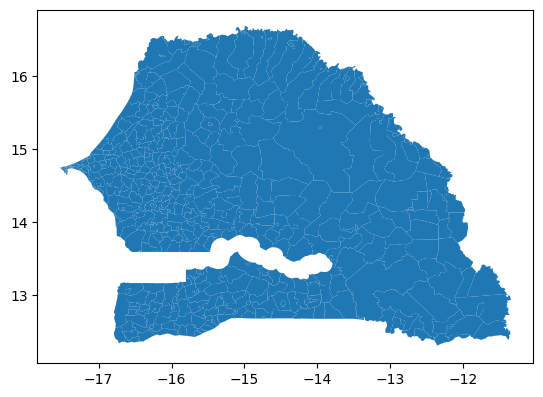

In [616]:
# Visualiser les limites de nos communes
geodf.plot()

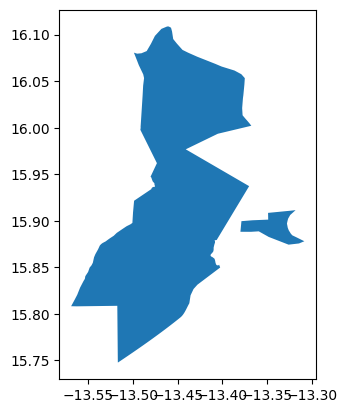

In [630]:
# Fonction pour visualiser une commune
def view_commune(gdf, commune):
    gdf = gdf[gdf['nom'] == commune]
    gdf.plot()
view_commune(geodf, 'BOKIDIAWE')

In [134]:
#geodf2[geodf2['nom'] == 'DAROU SALAM']

In [352]:
#geodf = geodf[['nom', 'code', 'arrondissement_id', 'surface', 'geometry']]

In [617]:
# # Extraire les colonnes qui respectent la structure définie dans la table `commune` de la base de données puis sauvegarder le géodataframe
geodf[['nom', 'code', 'arrondissement_id', 'surface', 'geometry']].to_csv('donnees.csv', sep = ';', index = False)

In [643]:
# fonction pour la visualisation des comunes avec OpenStreetMap
def view_gdf(gdf, style, location, tilelayer, fileds, alias, legend_name, choropleth_cols):
    geodf = geodf.set_crs({'init': 'epsg:4326'})
    ma = folium.Map(location = location)
    folium.TileLayer(tilelayer, control = False).add_to(ma)
    
    cp = folium.Choropleth(
        geo_data=gdf,
        name="choropleth",
        data=gdf,
        columns=choropleth_cols,
        key_on="feature.properties.code",
        fill_color="YlGn",
        fill_opacity=0.1,
        line_opacity=0.8,

        reset = True,
        legend_name=legend_name,
        ).add_to(ma)
    df = geodf.set_index('code')
    
    cp.geojson.add_child(folium.features.GeoJsonTooltip(
            fields = fields,
            aliases = alias,
            localize = True,
            sticky = False,
            #labels = False,
            style = style
                ,
            #max_width = 800,
            ))


    
    ma.add_child(plugins.Search(layer=cp.geojson,
        geom_type="Polygon",
        placeholder="Rechercher une commune",
        collapsed=False,
        position = 'topleft',
        search_label="nom commune",
        weight=5,))

    ma

In [ ]:
style =  """
            background-color:  '#F0FFF';
            border: 2px solid black;
            border-radius: 3px;
            box-shadow: 3px;
            """
location = [14.705442, -17.45537]
tilelayer = 'CartoDB positron'
fields = ["nom", "code", "Région", "Code région", "Departement", "Code departement", "Nom_arrondissement",
                 "arrondissement_id"]
aliases = ["commune :", "code commune", "Région", "Code Région", "Département", "Code Département", "Arrondissment",
                  "Code Arrondissment"]
legend_name = "Limites administratives des communes"
choropleth_cols = ["nom", "surface"]
vvvvvvvvvview(geodf, style, location, tilelayer, fileds, alias, legend_name, choropleth_cols)

In [640]:
#style_function =lambda x:{'fillColor': '#ffffff', 'color': '#000000', 'fillOpacity': 0.1, 'lineOpacity': 0.8,'weight': 0.1}
geodf = geodf.set_crs({'init': 'epsg:4326'})
ma = folium.Map(location = [14.705442, -17.45537])
folium.TileLayer('CartoDB positron', control = False).add_to(ma)
#bins = list(geodf['surface'].quantile([0, 0.25, 0.5, 0.75, 1]))
cp = folium.Choropleth(
    geo_data=geodf,
    name="choropleth",
    data=geodf,
    columns=["nom", "surface"],
    key_on="feature.properties.code",
    fill_color="YlGn",
    fill_opacity=0.1,
    line_opacity=0.8,
   
    reset = True,
    legend_name="Situation des infrastructures dans les communes",
    ).add_to(ma)
df = geodf.set_index('code')

cp.geojson.add_child(folium.features.GeoJsonTooltip(
        fields = ["nom", "code", "Région", "Code région", "Departement", "Code departement", "Nom_arrondissement",
                 "arrondissement_id"],
        aliases = ["commune :", "code commune", "Région", "Code Région", "Département", "Code Département", "Arrondissment",
                  "Code Arrondissment"],
        localize = True,
        sticky = False,
        #labels = False,
        style = """
            background-color:  '#F0FFF';
            border: 2px solid black;
            border-radius: 3px;
            box-shadow: 3px;
            """
            ,
        #max_width = 800,
        ))


#ma.add_child(cp)
#ma.keep_in_front(cp)

#plugins.FloatImage('detail.jpeg', bottom = 0, left = 0).add_to(ma)

ma.add_child(plugins.Search(layer=cp.geojson,
    geom_type="Polygon",
    placeholder="Rechercher un site",
    collapsed=False,
    position = 'topleft',
    search_label="nom",
    weight=5,))


#try:
#    ma = ma._repr_html_()
#except TypeError:
#    pass
ma

In [72]:
geodf2[geodf2['nom'] == 'SAINT LOUIS']

nom     code arrondissement_id      surface  \
449  SAINT LOUIS  SN04301            SN0430  1878.599135   

                                              geometry  
449  MULTIPOLYGON (((-16.50236 16.03836, -16.50225 ...

In [634]:
help(folium.Choropleth)

Help on class Choropleth in module folium.features:

class Choropleth(folium.map.FeatureGroup)
 |  Choropleth(geo_data: Any, data: Optional[Any] = None, columns: Optional[Sequence[Any]] = None, key_on: Optional[str] = None, bins: Union[int, Sequence[float]] = 6, fill_color: Optional[str] = None, nan_fill_color: str = 'black', fill_opacity: float = 0.6, nan_fill_opacity: Optional[float] = None, line_color: str = 'black', line_weight: float = 1, line_opacity: float = 1, name: Optional[str] = None, legend_name: str = '', overlay: bool = True, control: bool = True, show: bool = True, topojson: Optional[str] = None, smooth_factor: Optional[float] = None, highlight: bool = False, use_jenks: bool = False, **kwargs)
 |  
 |  Apply a GeoJSON overlay to the map.
 |  
 |  Plot a GeoJSON overlay on the base map. There is no requirement
 |  to bind data (passing just a GeoJSON plots a single-color overlay),
 |  but there is a data binding option to map your columnar data to
 |  different feature ob

In [74]:
geodf2.dtypes

nom                    object
code                   object
arrondissement_id      object
surface               float64
geometry             geometry
dtype: object

In [75]:
geodf2[geodf2['nom'] == 'MLOMP']

Empty GeoDataFrame
Columns: [nom, code, arrondissement_id, surface, geometry]
Index: []

In [76]:
geodf2

nom             code arrondissement_id  \
0                              ADEANE          SN02331            SN0233   
1                            AERE LAO          SN04247            SN0424   
2                         AFFE DJOLOF          SN08231            SN0823   
3                         AGNAM CIVOL          SN11241            SN1124   
4                               AOURE          SN11121            SN1112   
..                                ...              ...               ...   
547                     YEUMBEUL NORD          SN01521            SN0152   
548                      YEUMBEUL SUD          SN01522            SN0152   
549                              YOFF          SN01154            SN0115   
550                        ZIGUINCHOR          SN02301            SN0230   
0    KEUR MASSAR SUD/KEUR MASSAR NORD  SN01532/SN01511     SN0153/SN0151   

           surface                                           geometry  
0     20322.151721  POLYGON ((-15.99846 12.65653, -15.99816 12.656...  
1      1973.220693  POLYGON ((-14.32482 16.43023, -14.32370 16.412...  
2     32402.380719  POLYGON ((-15.44517 15.04669, -15.46380 15.009...  
3     62272.273984  POLYGON ((-13.56086 16.10680, -13.56124 16.105...  
4    174570.033873  POLYGON ((-12.96364 15.18905, -12.95532 15.172...  
..             ...                                                ...  
547     767.658427  POLYGON ((-17.35110 14.79471, -17.34796 14.793...  
548     226.862585  POLYGON ((-17.36658 14.77372, -17.36665 14.773...  
549    1385.589548  POLYGON ((-17.47536 14.76276, -17.47484 14.762...  
550    2806.044892  POLYGON ((-16.25137 12.59211, -16.25062 12.588...  
0      2065.514669  POLYGON ((-17.30355 14.82073, -17.30328 14.820...  

[552 rows x 5 columns]

In [77]:
df2

nom             code arrondissement_id  \
0                              ADEANE          SN02331            SN0233   
1                            AERE LAO          SN04247            SN0424   
2                         AFFE DJOLOF          SN08231            SN0823   
3                         AGNAM CIVOL          SN11241            SN1124   
4                               AOURE          SN11121            SN1112   
..                                ...              ...               ...   
547                     YEUMBEUL NORD          SN01521            SN0152   
548                      YEUMBEUL SUD          SN01522            SN0152   
549                              YOFF          SN01154            SN0115   
550                        ZIGUINCHOR          SN02301            SN0230   
0    KEUR MASSAR SUD/KEUR MASSAR NORD  SN01532/SN01511     SN0153/SN0151   

                                              geometry        surface  
0    POLYGON ((-15.99846 12.65653, -15.99816 12.656...   20322.151721  
1    POLYGON ((-14.32482 16.43023, -14.32370 16.412...    1973.220693  
2    POLYGON ((-15.44517 15.04669, -15.46380 15.009...   32402.380719  
3    POLYGON ((-13.56086 16.10680, -13.56124 16.105...   62272.273984  
4    POLYGON ((-12.96364 15.18905, -12.95532 15.172...  174570.033873  
..                                                 ...            ...  
547  POLYGON ((-17.35110 14.79471, -17.34796 14.793...     767.658427  
548  POLYGON ((-17.36658 14.77372, -17.36665 14.773...     226.862585  
549  POLYGON ((-17.47536 14.76276, -17.47484 14.762...    1385.589548  
550  POLYGON ((-16.25137 12.59211, -16.25062 12.588...    2806.044892  
0    POLYGON ((-17.30355 14.82073, -17.30328 14.820...    2065.514669  

[552 rows x 5 columns]

In [78]:
commune[commune['Commune'] == 'KEUR MASSAR SUD']

Région Code région  Departement Code departement Nom_arrondissement  \
52  DAKAR        SN01  KEUR MASSAR            SN015             JAXAAY   

   Code arrondissement          Commune Code commune  
52              SN0153  KEUR MASSAR SUD      SN01532

In [79]:
geodf2.drop_duplicates(subset = ['code'])

nom             code arrondissement_id  \
0                              ADEANE          SN02331            SN0233   
1                            AERE LAO          SN04247            SN0424   
2                         AFFE DJOLOF          SN08231            SN0823   
3                         AGNAM CIVOL          SN11241            SN1124   
4                               AOURE          SN11121            SN1112   
..                                ...              ...               ...   
547                     YEUMBEUL NORD          SN01521            SN0152   
548                      YEUMBEUL SUD          SN01522            SN0152   
549                              YOFF          SN01154            SN0115   
550                        ZIGUINCHOR          SN02301            SN0230   
0    KEUR MASSAR SUD/KEUR MASSAR NORD  SN01532/SN01511     SN0153/SN0151   

           surface                                           geometry  
0     20322.151721  POLYGON ((-15.99846 12.65653, -15.99816 12.656...  
1      1973.220693  POLYGON ((-14.32482 16.43023, -14.32370 16.412...  
2     32402.380719  POLYGON ((-15.44517 15.04669, -15.46380 15.009...  
3     62272.273984  POLYGON ((-13.56086 16.10680, -13.56124 16.105...  
4    174570.033873  POLYGON ((-12.96364 15.18905, -12.95532 15.172...  
..             ...                                                ...  
547     767.658427  POLYGON ((-17.35110 14.79471, -17.34796 14.793...  
548     226.862585  POLYGON ((-17.36658 14.77372, -17.36665 14.773...  
549    1385.589548  POLYGON ((-17.47536 14.76276, -17.47484 14.762...  
550    2806.044892  POLYGON ((-16.25137 12.59211, -16.25062 12.588...  
0      2065.514669  POLYGON ((-17.30355 14.82073, -17.30328 14.820...  

[552 rows x 5 columns]

In [80]:
arrondissement.shape

(168, 3)

In [81]:
len(set(geodf2['arrondissement_id'].to_list()))

169

In [82]:
len(set(commune['Code arrondissement'].to_list()))

168

In [83]:
commune[commune['Departement'] == 'KEUR MASSAR']

Région Code région  Departement Code departement Nom_arrondissement  \
51  DAKAR        SN01  KEUR MASSAR            SN015             JAXAAY   
52  DAKAR        SN01  KEUR MASSAR            SN015             JAXAAY   
47  DAKAR        SN01  KEUR MASSAR            SN015             MALIKA   
48  DAKAR        SN01  KEUR MASSAR            SN015             MALIKA   
49  DAKAR        SN01  KEUR MASSAR            SN015           YEUMBEUL   
50  DAKAR        SN01  KEUR MASSAR            SN015           YEUMBEUL   

   Code arrondissement           Commune Code commune  
51              SN0153  JAXAAY PARCELLES      SN01531  
52              SN0153   KEUR MASSAR SUD      SN01532  
47              SN0151  KEUR MASSAR NORD      SN01511  
48              SN0151            MALIKA      SN01512  
49              SN0152     YEUMBEUL NORD      SN01521  
50              SN0152      YEUMBEUL SUD      SN01522

In [84]:
geodf2[geodf2['nom'] == "KEUR MASSAR SUD/KEUR MASSAR NORD"]

nom             code arrondissement_id  \
0  KEUR MASSAR SUD/KEUR MASSAR NORD  SN01532/SN01511     SN0153/SN0151   

       surface                                           geometry  
0  2065.514669  POLYGON ((-17.30355 14.82073, -17.30328 14.820...

In [85]:
commune[commune['Commune'] == 'KEUR MASSAR SUD']

Région Code région  Departement Code departement Nom_arrondissement  \
52  DAKAR        SN01  KEUR MASSAR            SN015             JAXAAY   

   Code arrondissement          Commune Code commune  
52              SN0153  KEUR MASSAR SUD      SN01532

In [86]:
commune[commune['Commune'] == 'KEUR MASSAR NORD']

Région Code région  Departement Code departement Nom_arrondissement  \
47  DAKAR        SN01  KEUR MASSAR            SN015             MALIKA   

   Code arrondissement           Commune Code commune  
47              SN0151  KEUR MASSAR NORD      SN01511

In [87]:
arrondissement = arrondissement.reset_index(drop = True)

In [625]:
arrondissement.loc[168, 'Nom_arrondissement'] = 'JAXAAY/MALIKA'
arrondissement.loc[168, 'code'] = 'SN0153/SN0151'
arrondissement.loc[168, 'departement_id'] = 'SN015'

In [626]:
arrondissement.to_csv('arrondissements.csv', sep = ';', index = False)

In [90]:
arrondissement.shape

(169, 3)

In [91]:
geodf2

nom             code arrondissement_id  \
0                              ADEANE          SN02331            SN0233   
1                            AERE LAO          SN04247            SN0424   
2                         AFFE DJOLOF          SN08231            SN0823   
3                         AGNAM CIVOL          SN11241            SN1124   
4                               AOURE          SN11121            SN1112   
..                                ...              ...               ...   
547                     YEUMBEUL NORD          SN01521            SN0152   
548                      YEUMBEUL SUD          SN01522            SN0152   
549                              YOFF          SN01154            SN0115   
550                        ZIGUINCHOR          SN02301            SN0230   
0    KEUR MASSAR SUD/KEUR MASSAR NORD  SN01532/SN01511     SN0153/SN0151   

           surface                                           geometry  
0     20322.151721  POLYGON ((-15.99846 12.65653, -15.99816 12.656...  
1      1973.220693  POLYGON ((-14.32482 16.43023, -14.32370 16.412...  
2     32402.380719  POLYGON ((-15.44517 15.04669, -15.46380 15.009...  
3     62272.273984  POLYGON ((-13.56086 16.10680, -13.56124 16.105...  
4    174570.033873  POLYGON ((-12.96364 15.18905, -12.95532 15.172...  
..             ...                                                ...  
547     767.658427  POLYGON ((-17.35110 14.79471, -17.34796 14.793...  
548     226.862585  POLYGON ((-17.36658 14.77372, -17.36665 14.773...  
549    1385.589548  POLYGON ((-17.47536 14.76276, -17.47484 14.762...  
550    2806.044892  POLYGON ((-16.25137 12.59211, -16.25062 12.588...  
0      2065.514669  POLYGON ((-17.30355 14.82073, -17.30328 14.820...  

[552 rows x 5 columns]

In [92]:
commune = geodf2.copy()
commune = commune.reset_index(drop = True)
commune

nom             code arrondissement_id  \
0                              ADEANE          SN02331            SN0233   
1                            AERE LAO          SN04247            SN0424   
2                         AFFE DJOLOF          SN08231            SN0823   
3                         AGNAM CIVOL          SN11241            SN1124   
4                               AOURE          SN11121            SN1112   
..                                ...              ...               ...   
547                     YEUMBEUL NORD          SN01521            SN0152   
548                      YEUMBEUL SUD          SN01522            SN0152   
549                              YOFF          SN01154            SN0115   
550                        ZIGUINCHOR          SN02301            SN0230   
551  KEUR MASSAR SUD/KEUR MASSAR NORD  SN01532/SN01511     SN0153/SN0151   

           surface                                           geometry  
0     20322.151721  POLYGON ((-15.99846 12.65653, -15.99816 12.656...  
1      1973.220693  POLYGON ((-14.32482 16.43023, -14.32370 16.412...  
2     32402.380719  POLYGON ((-15.44517 15.04669, -15.46380 15.009...  
3     62272.273984  POLYGON ((-13.56086 16.10680, -13.56124 16.105...  
4    174570.033873  POLYGON ((-12.96364 15.18905, -12.95532 15.172...  
..             ...                                                ...  
547     767.658427  POLYGON ((-17.35110 14.79471, -17.34796 14.793...  
548     226.862585  POLYGON ((-17.36658 14.77372, -17.36665 14.773...  
549    1385.589548  POLYGON ((-17.47536 14.76276, -17.47484 14.762...  
550    2806.044892  POLYGON ((-16.25137 12.59211, -16.25062 12.588...  
551    2065.514669  POLYGON ((-17.30355 14.82073, -17.30328 14.820...  

[552 rows x 5 columns]

In [93]:
commune_explode = commune.explode('geometry')
multipolygon = commune_explode[commune_explode.duplicated(subset = ['code'], keep = False) == True]
multipolygon.reset_index(drop = True, inplace = True)

In [94]:
multipolygon

nom     code arrondissement_id       surface  \
0     BOKIDIAWE  SN11231            SN1123  39741.895889   
1     BOKIDIAWE  SN11231            SN1123  39741.895889   
2     BOKILADJI  SN11122            SN1112  57799.117352   
3     BOKILADJI  SN11122            SN1112  57799.117352   
4          KOAR  SN05343            SN0534  59634.760415   
5          KOAR  SN05343            SN0534  59634.760415   
6         NDIOB  SN09154            SN0915  12529.542624   
7         NDIOB  SN09154            SN0915  12529.542624   
8          NGOR  SN01152            SN0115    435.023028   
9          NGOR  SN01152            SN0115    435.023028   
10    OUARKHOKH  SN08263            SN0826  76292.938846   
11    OUARKHOKH  SN08263            SN0826  76292.938846   
12  SAINT LOUIS  SN04301            SN0430   1878.599135   
13  SAINT LOUIS  SN04301            SN0430   1878.599135   
14  SAINT LOUIS  SN04301            SN0430   1878.599135   

                                             geometry  
0   POLYGON ((-13.32585 15.88972, -13.32344 15.886...  
1   POLYGON ((-13.45626 16.10337, -13.45497 16.095...  
2   POLYGON ((-12.78253 15.09402, -12.76148 15.085...  
3   POLYGON ((-12.79761 15.12401, -12.80110 15.123...  
4   POLYGON ((-13.26933 13.84349, -13.22307 13.831...  
5   POLYGON ((-13.45032 13.92540, -13.44992 13.919...  
6   POLYGON ((-16.23341 14.46550, -16.23349 14.465...  
7   POLYGON ((-16.25444 14.57646, -16.25447 14.576...  
8   POLYGON ((-17.49860 14.75497, -17.49830 14.754...  
9   POLYGON ((-17.51195 14.75673, -17.51161 14.756...  
10  POLYGON ((-15.11311 15.51255, -15.11154 15.502...  
11  POLYGON ((-15.11311 15.51255, -15.17966 15.506...  
12  POLYGON ((-16.50236 16.03836, -16.50225 16.038...  
13  POLYGON ((-16.50564 16.04645, -16.50559 16.046...  
14  POLYGON ((-16.44369 16.06837, -16.44351 16.068...

<AxesSubplot:>

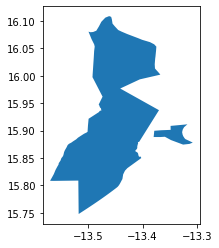

In [95]:
polygon_bokidiawe = [multipolygon.loc[0, 'geometry'], multipolygon.loc[1, 'geometry']]
bokidiawe = gpd.GeoSeries(cascaded_union(polygon_bokidiawe))
bokidiawe.plot()

<AxesSubplot:>

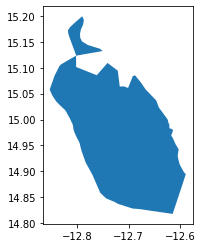

In [96]:
polygon_bokiladji = [multipolygon.loc[2, 'geometry'], multipolygon.loc[3, 'geometry']]
bokiladji = gpd.GeoSeries(cascaded_union(polygon_bokiladji))
bokiladji.plot()

<AxesSubplot:>

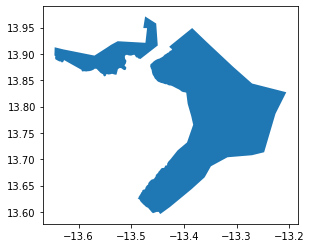

In [97]:
polygon_koar = [multipolygon.loc[4, 'geometry'], multipolygon.loc[5, 'geometry']]
koar = gpd.GeoSeries(cascaded_union(polygon_koar))
koar.plot()

<AxesSubplot:>

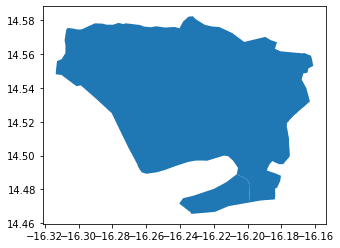

In [98]:
polygon_ndiob = [multipolygon.loc[6, 'geometry'], multipolygon.loc[7, 'geometry']]
ndiob = gpd.GeoSeries(cascaded_union(polygon_ndiob))
ndiob.plot()

<AxesSubplot:>

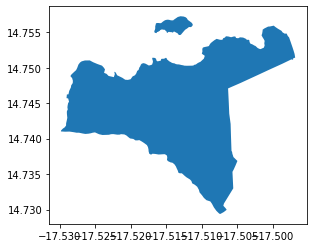

In [99]:
polygon_ngor = [multipolygon.loc[8, 'geometry'], multipolygon.loc[9, 'geometry']]
ngor = gpd.GeoSeries(cascaded_union(polygon_ngor))
ngor.plot()

<AxesSubplot:>

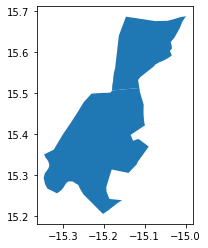

In [100]:
polygon_ouarkhokh = [multipolygon.loc[10, 'geometry'], multipolygon.loc[11, 'geometry']]
ouarkhokh = gpd.GeoSeries(cascaded_union(polygon_ouarkhokh))
ouarkhokh.plot()

<AxesSubplot:>

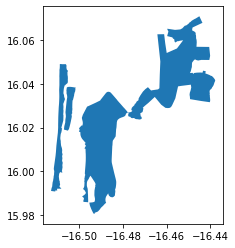

In [101]:
polygon_sl = [multipolygon.loc[12, 'geometry'], multipolygon.loc[13, 'geometry'], multipolygon.loc[14, 'geometry']]
saint_louis = gpd.GeoSeries(cascaded_union(polygon_sl))
saint_louis.plot()

In [102]:
double = list(set(multipolygon['nom'].values))
double

['BOKIDIAWE', 'BOKILADJI', 'KOAR', 'SAINT LOUIS', 'NGOR', 'NDIOB', 'OUARKHOKH']

In [103]:
commune_explode = commune_explode.drop_duplicates(subset = ['code'], keep = 'first')

In [104]:
commune_explode[commune_explode['nom'] == 'OUARKHOKH']

nom     code arrondissement_id       surface  \
396 0  OUARKHOKH  SN08263            SN0826  76292.938846   

                                                geometry  
396 0  POLYGON ((-15.11311 15.51255, -15.11154 15.502...

In [105]:
commune_explode.loc[34, 'geometry'] = bokidiawe.values
commune_explode.loc[35, 'geometry'] = bokiladji.values
commune_explode.loc[230, 'geometry'] = koar.values
commune_explode.loc[336, 'geometry'] = ndiob.values
commune_explode.loc[362, 'geometry'] = ngor.values
commune_explode.loc[396, 'geometry'] = ouarkhokh.values
commune_explode.loc[449, 'geometry'] = saint_louis.values

In [106]:
for i in commune_explode['geometry']:
    print(type(i))

<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'sha

In [107]:
commune_explode

nom             code arrondissement_id  \
0   0                            ADEANE          SN02331            SN0233   
1   0                          AERE LAO          SN04247            SN0424   
2   0                       AFFE DJOLOF          SN08231            SN0823   
3   0                       AGNAM CIVOL          SN11241            SN1124   
4   0                             AOURE          SN11121            SN1112   
...                                 ...              ...               ...   
547 0                     YEUMBEUL NORD          SN01521            SN0152   
548 0                      YEUMBEUL SUD          SN01522            SN0152   
549 0                              YOFF          SN01154            SN0115   
550 0                        ZIGUINCHOR          SN02301            SN0230   
551 0  KEUR MASSAR SUD/KEUR MASSAR NORD  SN01532/SN01511     SN0153/SN0151   

             surface                                           geometry  
0   0   20322.151721  POLYGON ((-15.99846 12.65653, -15.99816 12.656...  
1   0    1973.220693  POLYGON ((-14.32482 16.43023, -14.32370 16.412...  
2   0   32402.380719  POLYGON ((-15.44517 15.04669, -15.46380 15.009...  
3   0   62272.273984  POLYGON ((-13.56086 16.10680, -13.56124 16.105...  
4   0  174570.033873  POLYGON ((-12.96364 15.18905, -12.95532 15.172...  
...              ...                                                ...  
547 0     767.658427  POLYGON ((-17.35110 14.79471, -17.34796 14.793...  
548 0     226.862585  POLYGON ((-17.36658 14.77372, -17.36665 14.773...  
549 0    1385.589548  POLYGON ((-17.47536 14.76276, -17.47484 14.762...  
550 0    2806.044892  POLYGON ((-16.25137 12.59211, -16.25062 12.588...  
551 0    2065.514669  POLYGON ((-17.30355 14.82073, -17.30328 14.820...  

[552 rows x 5 columns]

In [108]:
bokidiawe

0    MULTIPOLYGON (((-13.32344 15.88600, -13.32185 ...
dtype: geometry

In [109]:
commune.dtypes

nom                    object
code                   object
arrondissement_id      object
surface               float64
geometry             geometry
dtype: object

In [110]:
dir(shapely.geometry)

NameError: name 'shapely' is not defined

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 141.2 kB/s eta 0:00:001m150.2 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 212.7 kB/s eta 0:00:00 kB/s eta 0:00:01
